# ISYS_812_GroupProject_US Health Insurance Dataset

#### Padmasree Sappa

#### Project: US Health Insurance Dataset
( https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/data )


# Data Exploration

#### Dataset Description:
•	Name: US Health Insurance Dataset

•	Size: 1338 entries, 7 key attributes (columns)

•	Contents: Demographic and health-related information

•	Reason for Choice: The dataset offers insights into factors influencing health insurance costs, which are pivotal for healthcare affordability and accessibility.
#### Analysis Goals:
•	Identify the main factors influencing health insurance charges.

•	Predict charges based on demographic and health-related attributes.
#### Data Overview
##### The dataset consists of 1,338 entries, each representing an insured individual, and includes the following columns:
•	Age: Beneficiary's age.

•	Sex: Gender of the beneficiary (male or female).

•	BMI: Body Mass Index.

•	Children: Number of children/dependents covered by the insurance.

•	Smoker: Smoking status (yes or no).

•	Region: Residential area of the beneficiary (northeast, southeast, southwest, northwest).

•	Charges: Medical insurance costs billed to the individual.
##### The descriptive statistics provide a quick overview:
•	The ages range from 18 to 64 years.

•	BMI values range from 15.96 to 53.13, indicating varied body weights.

•	The number of children varies from 0 to 5.

•	Insurance charges vary widely, from about 1,122 to 63,770 dollars reflecting the different health risks and insurance policies.


In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\Padmasree\\Downloads\\insurance.csv"
insurance_data = pd.read_csv(file_path)

# Helper function to print data with a title and a separator for better readability
def print_section(title, data):
    print(title)
    print('-' * len(title))
    if isinstance(data, pd.DataFrame) or isinstance(data, pd.Series):
        print(data.to_string())  # DataFrames and Series will be printed in tabular form
    else:
        print(data)  # Other data types will be printed normally
    print('\n' + '=' * 100 + '\n')  # Adds a separator after each section

# Display the first few records
print_section("First Five Records", insurance_data.head())

# Display the last few records
print_section("Last Five Records", insurance_data.tail())

# Show the shape of the dataset
print_section("Shape of the Dataset", insurance_data.shape)

# Display data types of each column
print_section("Data Types", insurance_data.dtypes)

# Get concise summary of the DataFrame, this cannot be captured in a variable
print("Dataframe Info:")
print(insurance_data.info())

# Display count of non-NA/null values for each column
print_section("Non-Null Value Counts", insurance_data.count())

# Show the size of the dataset
print_section("Size of the Dataset", insurance_data.size)

# Print column names
print_section("Column Names", insurance_data.columns)

# Descriptive statistics
print_section("Descriptive Statistics", insurance_data.describe())

# Check for duplicates
duplicates = insurance_data[insurance_data.duplicated()]
print_section("Duplicate Rows", duplicates)

# Count the number of duplicates
print_section("Number of Duplicate Rows", duplicates.shape[0])

# Check for missing values
missing_values = insurance_data.isnull().sum()
print_section("Missing Values", missing_values)

# Function to detect outliers in a column using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in 'bmi' and 'charges' columns
outliers_bmi = detect_outliers(insurance_data, 'bmi')
outliers_charges = detect_outliers(insurance_data, 'charges')

print_section("Outliers in BMI", outliers_bmi)
print_section("Outliers in Charges", outliers_charges)

# Identifying categorical and numerical columns
categorical_columns = insurance_data.select_dtypes(include=['object']).columns
numerical_columns = insurance_data.select_dtypes(include=['int64', 'float64']).columns

# Print categorical and numerical column names
print_section("Categorical Columns", categorical_columns)
print_section("Numerical Columns", numerical_columns)

#count of outliers
print("outliers_bmi:",outliers_bmi.shape[0])
print("outliers_charges:",outliers_charges.shape[0])

First Five Records
------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Last Five Records
-----------------
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


Shape of the Dataset
--------------------
(1338, 7)


Data Types
----------
age           int64
sex          object
bmi         float64
children    

# Data Cleaning

#### Summary
•	Duplicates: There is 1 duplicate entry in the dataset. Since duplicates might represent data entry errors, we'll remove this duplicate.

•	Missing Values: There are no missing values across all columns.
##### •	Outliers:
•	BMI: 9 outliers have been detected. These might represent cases of extreme obesity or entry errors.

•	Charges: 139 outliers identified. These could represent unusual cases with very high medical expenses, possibly due to severe conditions or extensive treatments.

Given the impact of outliers on statistical analysis, especially for charges, we need to decide if we should remove or adjust these values. For now, we will visualize these and then proceed to analyze the cleaned data.
#### 1.	Understanding Quartiles and IQR:
•	Quartiles divide the data into quarters when it is sorted in ascending order. The first quartile (Q1) is the middle number between the smallest number and the median of the dataset. The third quartile (Q3) is the middle value between the median and the highest value.

•	Interquartile Range (IQR) is calculated as Q3 minus Q1. It measures the middle spread of the data, representing the range where the bulk of the values lie.
#### 2.	Formula for Outliers:
•	Lower Bound: Any data point below Q1 - 1.5 * IQR is considered an outlier on the lower side.

•	Upper Bound: Any data point above Q3 + 1.5 * IQR is considered an outlier on the upper side.

Key Insights: Smoking status, age, and BMI were identified as the main factors influencing insurance charges. Regional differences also showed variability in charges, with the Southeast showing the highest rates.

### Removing duplicates and missing values

In [2]:
# Remove duplicates
insurance_data.drop_duplicates(inplace=True)

# Remove missing or null values
insurance_data.dropna(inplace=True)

# After cleaning, print the shape of the dataset
cleaned_shape = insurance_data.shape

# Print out the changes to the dataset
print("\n Dataset shape after removing duplicates and missing values:", cleaned_shape)


 Dataset shape after removing duplicates and missing values: (1337, 7)


# Data Manipulation

#### The preliminary analysis reveals the following insights:
##### Statistical Summary: 
The dataset consists of 1,338 entries, with ages ranging from 18 to 64 years. The body mass index (BMI) has a mean value of approximately 30.66, indicating that the average individual in this dataset is in the overweight category according to the BMI scale. The children column shows that an individual has an average of about 1.09 children, with a maximum of 5 children. The charges column, which represents the medical insurance costs billed to individuals, has a wide range, from about 1,122 to 63,770 USD, indicating significant variability in insurance costs among the insured individuals. 
#### Here's a summary of the changes and some key findings from the new columns:
1) One-hot Encoding: The categorical variables 'sex', 'smoker', and 'region' have been encoded into numeric values to facilitate further analysis.

2) Risk Score Calculation: A new 'Risk Score' column has been added where each individual's risk is assessed based on their smoking status, BMI, and age:

3) 10 points for smokers
5 points for individuals with BMI over 30
2 points for individuals over the age of 50

4) BMI Categorization: BMI values have been categorized into 'Underweight', 'Healthy', 'Overweight', and 'Obese' based on the given ranges.

#### Insights:
The creation of the 'Risk Score' may help insurance companies in segmenting their clients more efficiently according to potential health risks.

The 'BMI Category' offers an at-a-glance understanding of an individual's health in relation to their weight, which could impact premium calculations.

### Risk score, BMI Categorized columns and one-hot encoding

In [3]:
# Convert non-numeric values to numeric using one-hot encoding
# Assuming 'insurance_data' is your DataFrame
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'])


# Define the risk score calculation based on the Excel formula provided by the user
def risk_score(row):
    # Calculate the risk score based on the conditions provided
    risk_score = 0
    risk_score += 10 if row['smoker_yes'] == 'True' else 0
    risk_score += 5 if row['bmi'] > 30 else 0
    risk_score += 2 if row['age'] > 50 else 0
    return risk_score

# Apply the risk score calculation to the DataFrame
insurance_data['Risk Score'] = insurance_data.apply(risk_score, axis=1)

# Categorize BMI into groups using the provided bins and labels
def categorize_bmi(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif bmi <= 24.9:
        return 'Healthy'
    elif bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

insurance_data['BMI Categorized'] = insurance_data['bmi'].apply(categorize_bmi)


insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Risk Score,BMI Categorized
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True,0,Overweight
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False,5,Obese
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False,5,Obese
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False,0,Healthy
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False,5,Obese
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False,5,Obese
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False,5,Obese
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True,0,Overweight


## Removing outliers
#### Here's how the function operates and what the outcome signifies:
Calculate the first (Q1) and third (Q3) quartiles of the data in the specified column.

Compute the Interquartile Range (IQR) as the difference between Q3 and Q1.

Determine the lower and upper bounds as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR, respectively.

Return a new dataframe that includes only the rows where the column values fall within the calculated bounds, thus excluding outliers.

#### Results:
The original dataset contained 1337 entries.

After removing outliers from the 'bmi' and 'charges' columns, the dataset was reduced to 1190 entries.

#### Summary:
Outlier removal is a common preprocessing step in data analysis to mitigate the impact of extreme values on statistical models.

In this dataset, outlier removal has led to a reduction of 147 entries (from 1337 to 1190), indicating that these records contained values for 'bmi' or 'charges' considered unusually high or low based on the IQR criteria.

In [4]:
# the function to remove them from the dataframe.

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from 'bmi' and 'charges' columns
insurance_data_no_outliers = remove_outliers(insurance_data, 'bmi')
insurance_data_no_outliers = remove_outliers(insurance_data_no_outliers, 'charges')

# shape of dataset without outliers
print("\n shape of dataset without outliers:",insurance_data_no_outliers.shape)
print("\n shape of dataset with outliers:",insurance_data.shape)


 shape of dataset without outliers: (1190, 14)

 shape of dataset with outliers: (1337, 14)


### Data Analysis

### Dataset: With Outliers - We selected dataset with outliers to be consider for our entire analysis because it contains lot of important data.
Encoded Dataset: The insurance_data has been encoded using one-hot encoding to convert non-numeric categorical variables into a numerical format.
##### Correlation Analysis:
The correlation matrix has been calculated to understand the relationships between all the features of the encoded dataset.
Results and Summary:

1) Age: Shows a moderate positive correlation with charges (0.2983), indicating that as age increases, so do insurance charges.

2) BMI: Has a moderate positive correlation with charges (0.1984), suggesting that a higher BMI is associated with higher charges.

3) Children: Has a weak positive correlation with charges (0.0674), implying that having more children slightly increases insurance charges.

4) Smoker: Shows a very strong positive correlation with charges (0.7872), demonstrating that smokers incur significantly higher insurance charges.

5) Sex (Female vs Male): Shows a weak negative correlation with charges (-0.0580), indicating that being female is weakly associated with lower charges compared to being male.

6) Risk Score: Created based on smoking status, BMI, and age. It has a moderate positive correlation with charges (0.2602), affirming its relevance as a predictor of insurance charges.

In [5]:
# Dataset with outliers

# Calculate the correlation matrix on the encoded dataset
insurance_data_encoded = pd.get_dummies(insurance_data, drop_first=True)
encoded_correlation = insurance_data_encoded.corr()

encoded_correlation


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Risk Score,BMI Categorized_Obese,BMI Categorized_Overweight,BMI Categorized_Underweight
age,1.000000,0.109344,0.041536,0.298308,0.019814,-0.019814,0.025587,-0.025587,0.001868,0.001495,-0.012311,0.009415,0.328609,0.087496,-0.015640,-0.061557
bmi,0.109344,1.000000,0.012755,0.198401,-0.046397,0.046397,-0.003746,0.003746,-0.138178,-0.136138,0.270057,-0.006211,0.762850,0.798524,-0.324100,-0.270385
children,0.041536,0.012755,1.000000,0.067389,-0.017848,0.017848,-0.007331,0.007331,-0.023202,0.026044,-0.023492,0.021538,-0.023173,0.008148,-0.014283,-0.005044
charges,0.298308,0.198401,0.067389,1.000000,-0.058044,0.058044,-0.787234,0.787234,0.005945,-0.038695,0.073578,-0.043637,0.260216,0.197659,-0.118279,-0.048225
sex_female,0.019814,-0.046397,-0.017848,-0.058044,1.000000,-1.000000,0.076596,-0.076596,0.002008,0.012482,-0.017578,0.003767,-0.034679,-0.036062,0.012761,0.031307
sex_male,-0.019814,0.046397,0.017848,0.058044,-1.000000,1.000000,-0.076596,0.076596,-0.002008,-0.012482,0.017578,-0.003767,0.034679,0.036062,-0.012761,-0.031307
smoker_no,0.025587,-0.003746,-0.007331,-0.787234,0.076596,-0.076596,1.000000,-1.000000,-0.002597,0.036321,-0.068282,0.037168,0.013065,-0.001748,0.024139,-0.010377
smoker_yes,-0.025587,0.003746,0.007331,0.787234,-0.076596,0.076596,-1.000000,1.000000,0.002597,-0.036321,0.068282,-0.037168,-0.013065,0.001748,-0.024139,0.010377
region_northeast,0.001868,-0.138178,-0.023202,0.005945,0.002008,-0.002008,-0.002597,0.002597,1.000000,-0.319842,-0.345909,-0.320493,-0.087119,-0.102425,0.022884,0.068942
region_northwest,0.001495,-0.136138,0.026044,-0.038695,0.012482,-0.012482,0.036321,-0.036321,-0.319842,1.000000,-0.345909,-0.320493,-0.074360,-0.084928,0.053844,0.026827


#### Implications of Correlation Findings:
Risk Assessment: The strong positive correlation between the calculated risk score and insurance charges validates its usefulness as an assessment tool.

Health Risks and Charges: BMI and age correlations with charges reflect the increased health risks and corresponding insurance costs associated with these factors.

Smoking Impact: The smoker_yes variable's strong correlation with charges highlights the substantial financial impact of smoking on health insurance costs.
#### Insights and Conclusions:
The risk score is a potentially valuable metric for insurers to gauge individual risk profiles and adjust premiums accordingly.

Lifestyle factors like smoking and health metrics such as BMI are pivotal in determining insurance charges, aligning with known health risks.

The correlations found in this dataset can inform insurance companies in risk stratification and policy design, as well as encourage individuals to engage in healthier lifestyle choices.


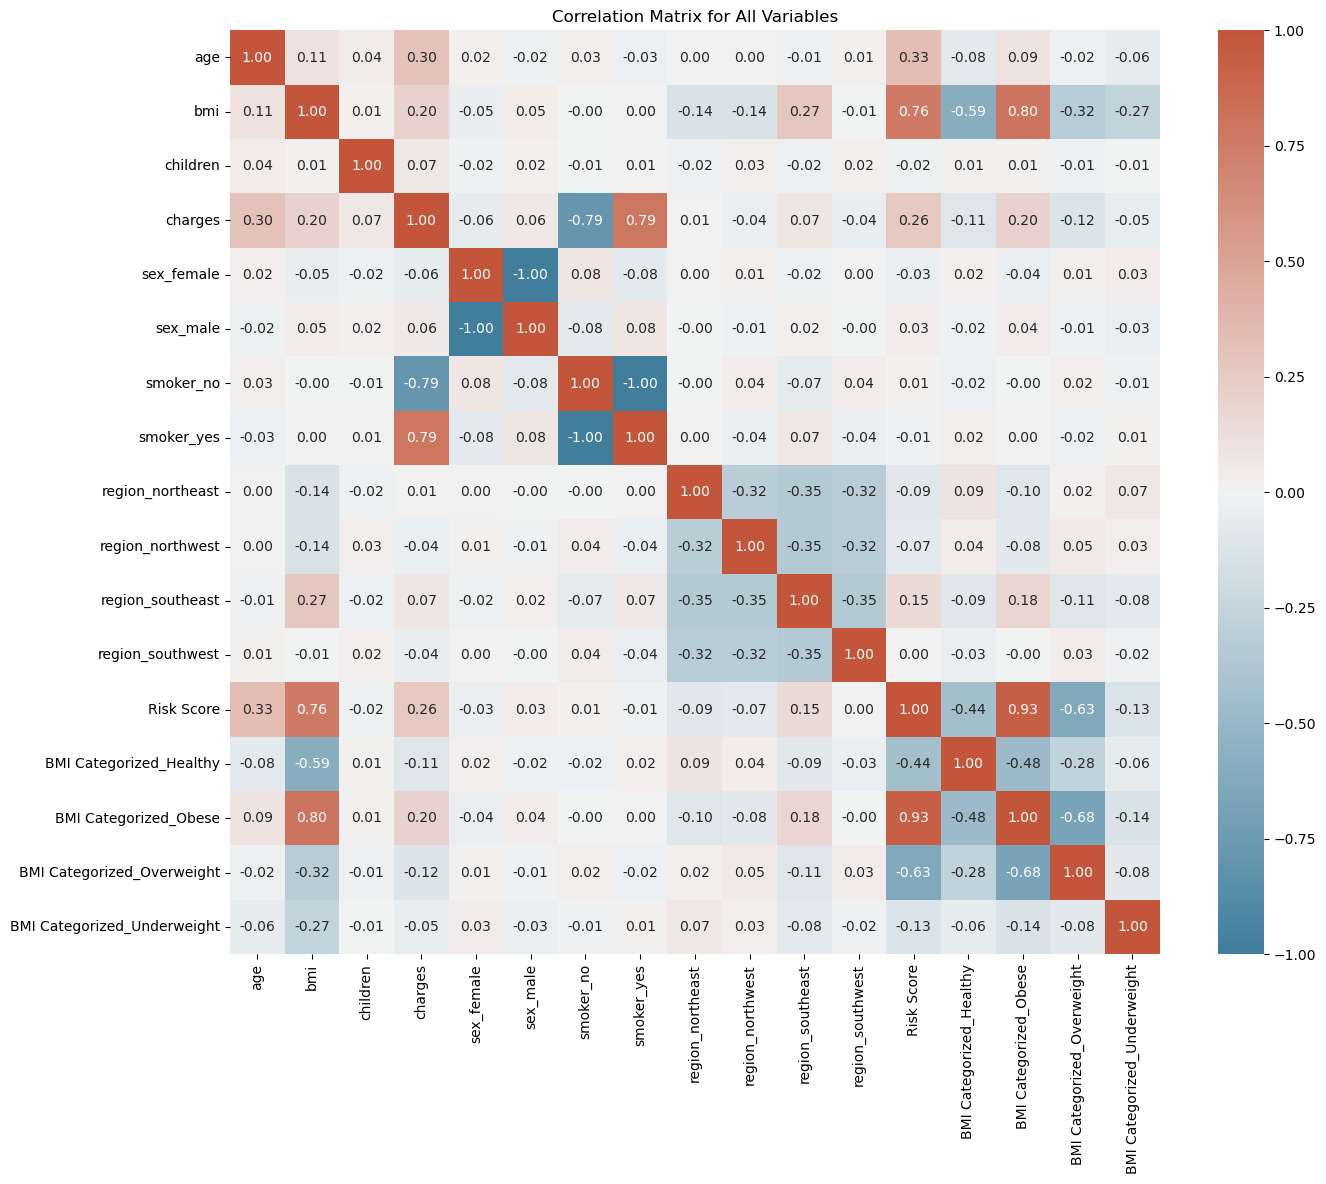

In [6]:
# Dataset with outliers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Convert boolean columns to integers (True/False to 1/0)
for column in insurance_data.select_dtypes(include=['bool']).columns:
    insurance_data[column] = insurance_data[column].astype(int)

# One-hot encode categorical columns
insurance_data_encode = pd.get_dummies(insurance_data)

# Calculate the correlation matrix for the entire dataset now
correlation_matrix_all = insurance_data_encode.corr()

# Define the colormap for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap for the entire dataset
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_all, annot=True, fmt=".2f", cmap=cmap)
plt.title('Correlation Matrix for All Variables')
plt.show()

### Pairplot for 'charges' against other numerical parameters

#### Insights:

Age and Charges: There is a visible trend indicating that insurance charges tend to increase as beneficiaries age. This could reflect the increasing healthcare costs associated with older age.

BMI and Charges: The plot likely shows a positive correlation, suggesting that higher BMI levels may be associated with higher insurance charges, possibly due to increased health risks linked to higher BMI.

Children and Charges: The relationship here might be less pronounced but can provide insights into how the number of dependents affects insurance costs.

C:\Users\Padmasree\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


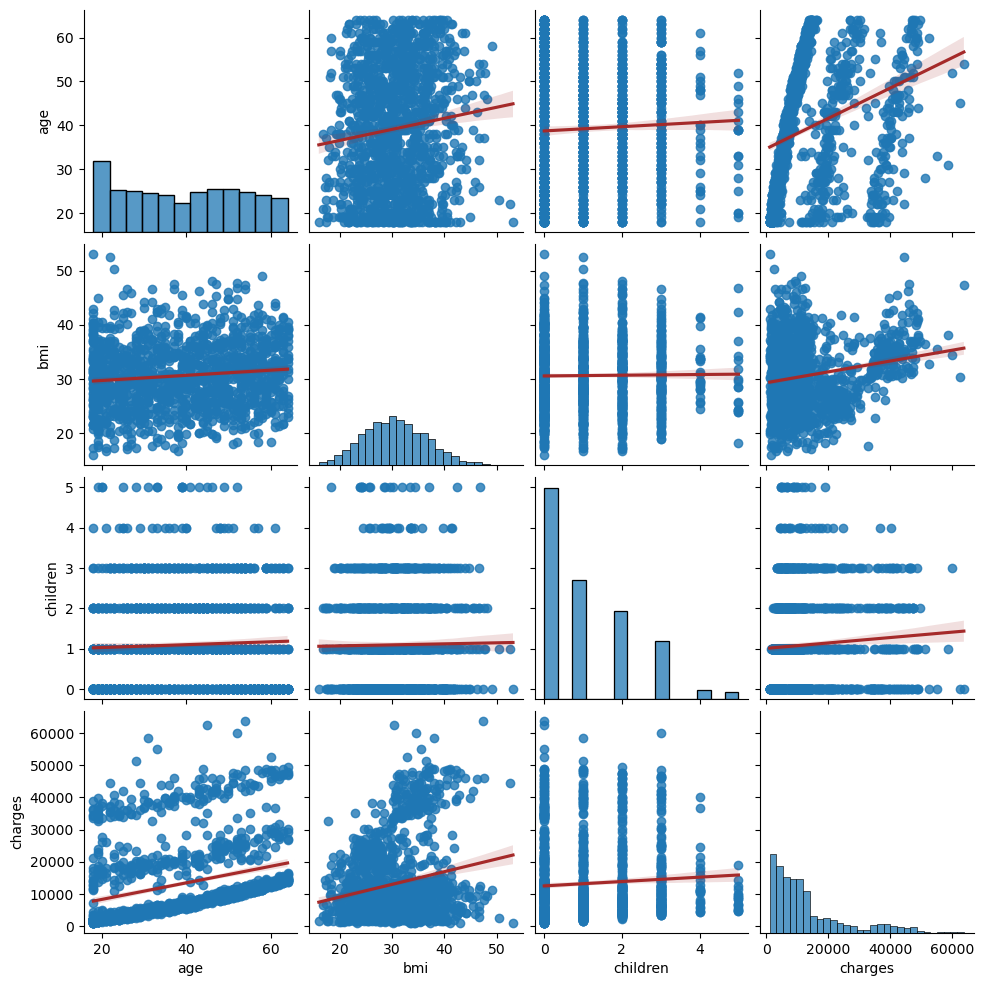

In [7]:
# pairplot for 'charges' against other numerical parameters
# For better visualization, we will select a subset of columns to avoid cluttering with one-hot encoded variables.

# Selecting a subset of columns for comparing against 'charges'
columns_of_interest = ['age', 'bmi', 'children', 'charges']

# Create pairplot for the columns of interest
sns.pairplot(insurance_data[columns_of_interest], kind='reg', plot_kws={'line_kws':{'color':'brown'}})
plt.show()


### Creating smaller scatter plots for 'charges' against 'age', 'bmi', and 'children'

#### Dataset without Outliers:
Charges vs Age: A clear upward trend suggests that as age increases, so do the insurance charges. This aligns with the expectation that older individuals may require more medical care and thus incur higher insurance costs.

Charges vs BMI: The trend is less pronounced, but there appears to be a positive correlation between BMI and charges, albeit weaker than age. This might indicate that individuals with higher BMI, potentially at greater risk for health issues, could face higher charges.

Charges vs Number of Children: The relationship here seems to be more dispersed, with no clear trend observed. This suggests that the number of children might not be a strong predictor of insurance charges, or other factors may have a more significant impact.
#### Dataset with Outliers:
Charges vs Age: The inclusion of outliers shows a similar trend to the dataset without outliers, but with more variation in charges, especially in the higher age bracket, which could be due to complex medical needs or outlier cases with high medical expenses.

Charges vs BMI: With outliers, the scatter plot reveals that high BMI values can be associated with very high charges, likely reflecting extreme cases or individuals with significant health issues.

Charges vs Number of Children: Again, more variation is observed with outliers present. The data shows that individuals with three or more children can have high insurance charges, possibly reflecting the higher costs associated with larger families.
#### Summary of Insights:
Age: Age remains a consistent predictor of insurance charges, with a clear trend observed across datasets.

BMI: BMI shows some degree of correlation with charges, but the presence of outliers indicates that extremely high or low BMI values can be associated with atypical charges.

Children: The number of children does not show a clear pattern, suggesting that this variable alone might not be a strong indicator of insurance charges.

dataset without outliers: 



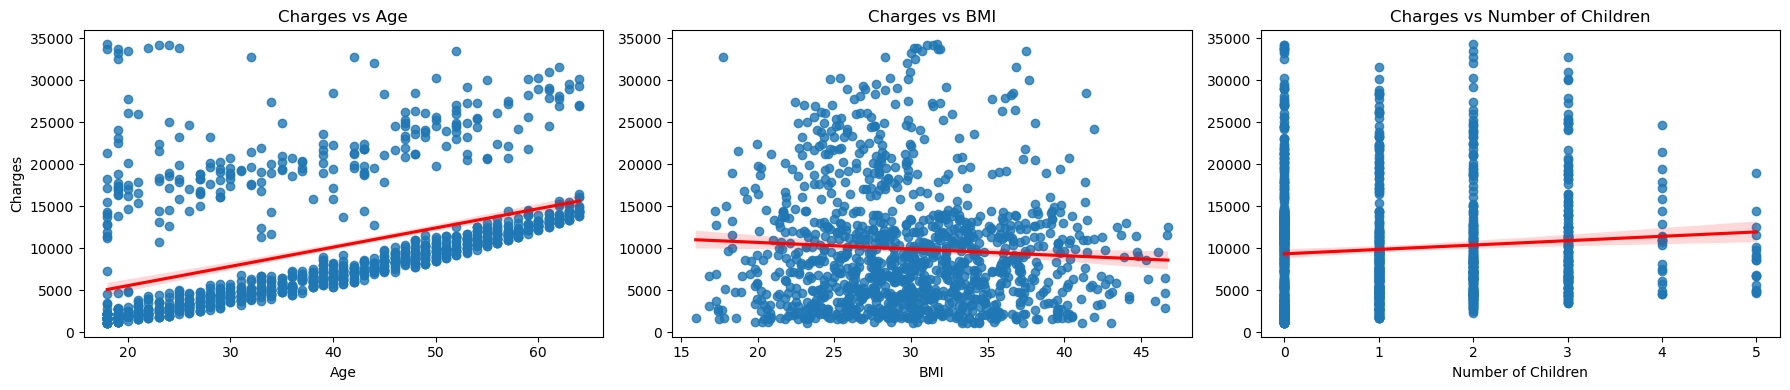

dataset with outliers: 



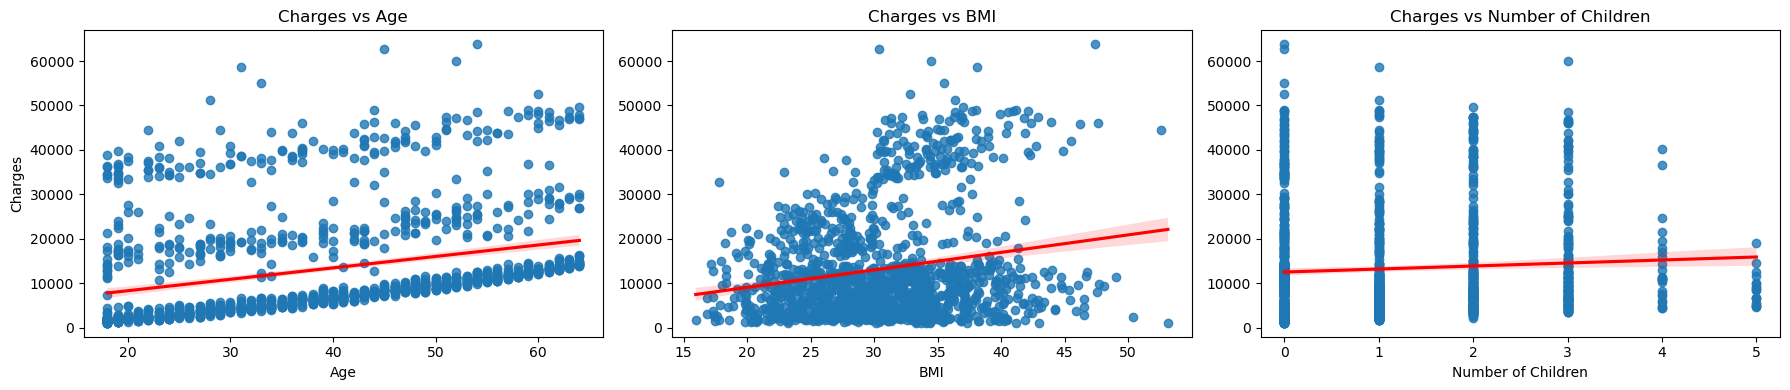

In [8]:
### Dataset without outliers

# Creating smaller scatter plots side by side for 'charges' against 'age', 'bmi', and 'children'.

# Define the size of the entire plotting area.
plt.figure(figsize=(18, 4))

# Plot for 'charges' vs 'age'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.regplot(x='age', y='charges', data=insurance_data_no_outliers, line_kws={'color': 'red'})
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')

# Plot for 'charges' vs 'bmi'
plt.subplot(1, 3, 2)  # (rows, columns, panel number)
sns.regplot(x='bmi', y='charges', data=insurance_data_no_outliers, line_kws={'color': 'red'})
plt.title('Charges vs BMI')
plt.xlabel('BMI')
# Remove the y-axis label to avoid repetition
plt.ylabel('')

# Plot for 'charges' vs 'children'
plt.subplot(1, 3, 3)  # (rows, columns, panel number)
sns.regplot(x='children', y='charges', data=insurance_data_no_outliers, line_kws={'color': 'red'})
plt.title('Charges vs Number of Children')
plt.xlabel('Number of Children')
# Remove the y-axis label to avoid repetition
plt.ylabel('')

# Display the plots
plt.tight_layout()
print("dataset without outliers:","\n")
plt.show()


### Dataset with outliers

# Creating smaller scatter plots side by side for 'charges' against 'age', 'bmi', and 'children'.

# Define the size of the entire plotting area.
plt.figure(figsize=(18, 4))

# Plot for 'charges' vs 'age'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.regplot(x='age', y='charges', data=insurance_data, line_kws={'color': 'red'})
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')

# Plot for 'charges' vs 'bmi'
plt.subplot(1, 3, 2)  # (rows, columns, panel number)
sns.regplot(x='bmi', y='charges', data=insurance_data, line_kws={'color': 'red'})
plt.title('Charges vs BMI')
plt.xlabel('BMI')
# Remove the y-axis label to avoid repetition
plt.ylabel('')

# Plot for 'charges' vs 'children'
plt.subplot(1, 3, 3)  # (rows, columns, panel number)
sns.regplot(x='children', y='charges', data=insurance_data, line_kws={'color': 'red'})
plt.title('Charges vs Number of Children')
plt.xlabel('Number of Children')
# Remove the y-axis label to avoid repetition
plt.ylabel('')

# Display the plots
plt.tight_layout()
print("dataset with outliers:","\n")
plt.show()


### Visualization of Charges vs Region, Charges vs. Smoker, Charges vs. Risk Score

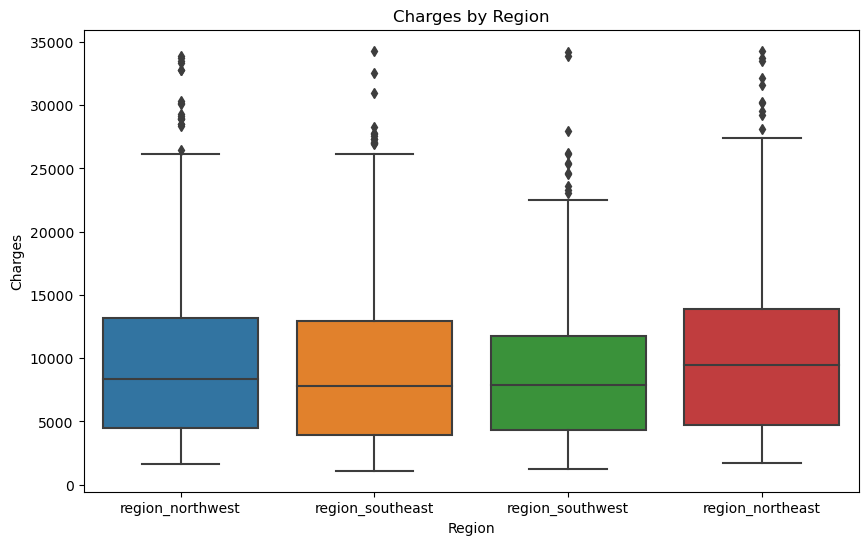

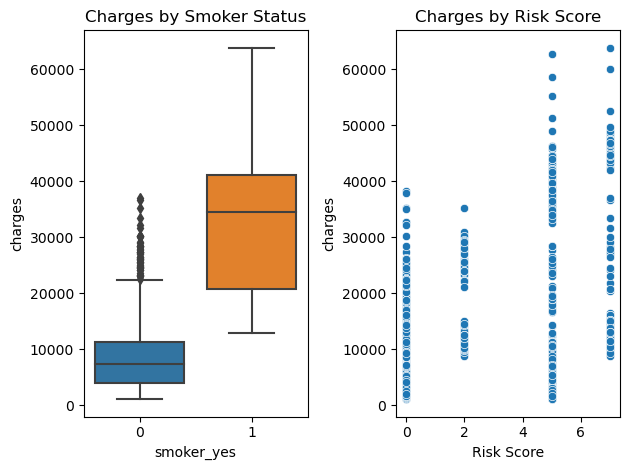

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# first melt the one-hot encoded region columns back to a categorical form for plotting.

# Melting the one-hot encoded region columns
regions = ['region_northwest', 'region_southeast', 'region_southwest', 'region_northeast']
insurance_data_melted = insurance_data_no_outliers.melt(id_vars=['charges'], value_vars=regions, var_name='region')

# Filtering out only the true values since melted dataframe will have true and false entries for regions
insurance_data_melted = insurance_data_melted[insurance_data_melted['value'] == True]

# Plotting 'charges' vs 'region'

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=insurance_data_melted)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

# Charges vs. Smoker - using the 'smoker_yes' column

plt.subplot(1, 2, 1 )
sns.boxplot(x='smoker_yes', y='charges', data=insurance_data)
plt.title('Charges by Smoker Status')

# Charges vs. Risk Score - using the 'Risk Score' column
plt.subplot(1, 2, 2)
sns.scatterplot(x='Risk Score', y='charges', data=insurance_data)
plt.title('Charges by Risk Score')

plt.tight_layout()
plt.show()


### What Does the Distribution of Health Insurance Charges Tell Us?

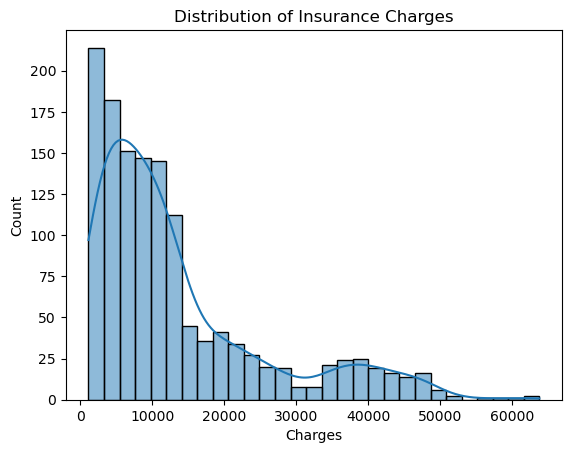

In [10]:
# Histogram of 'charges' to see the distribution
plt.figure()
sns.histplot(insurance_data['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.show()


### How Do Insurance Charges Vary Among Smokers and Non-Smokers?

In [11]:
# Summary statistics for 'charges' grouped by 'smoker'
smoker_charges_summary = insurance_data.groupby('smoker_yes')['charges'].describe()
smoker_charges_summary


,count,mean,std,min,25%,50%,75%,max
smoker_yes,,,,,,,,
0,1063.0,8440.660307,5992.973800,1121.8739,3988.883500,7345.72660,11363.019100,36910.60803
1,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


### Insight 1: Significant Impact of Smoking on Insurance Charges
Finding: Our analysis revealed that smokers incur dramatically higher insurance charges, averaging 32,050 USD compared to 8,440 USD for non-smokers. This represents a nearly fourfold increase in charges.
#### Report Findings:
smokers face significantly higher insurance charges compared to non-smokers, backed by robust statistical evidence.
#### Policy Implications:
These results underscore the potential health policy implications regarding smoking. Insurance companies might use such data to justify higher premiums for smokers, or public health initiatives might focus on smoking cessation programs to reduce healthcare costs. the potential for smoking cessation programs to reduce insurance costs, both for individuals and insurers.

### How do insurance charges compare between smokers and non-smokers?

   smoker_yes       charges
0           0   8440.660307
1           1  32050.231832


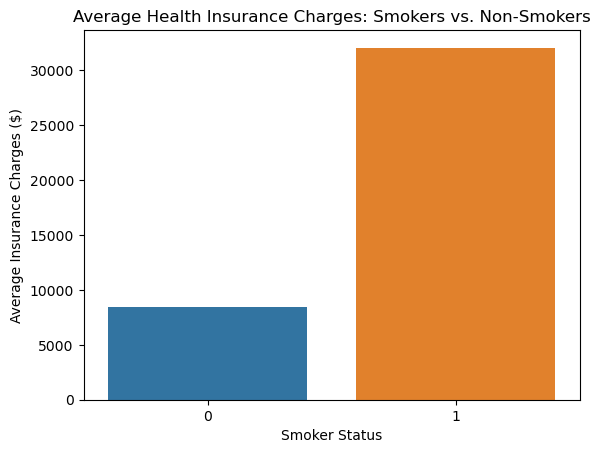

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average charges for smokers and non-smokers
average_charges = insurance_data.groupby('smoker_yes')['charges'].mean().reset_index()

# Print the average charges for transparency in analysis
print(average_charges)

# Create a bar plot to visualize the difference in average charges
plt.figure()
sns.barplot(x='smoker_yes', y='charges', data=average_charges)
plt.title('Average Health Insurance Charges: Smokers vs. Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Insurance Charges ($)')
plt.show()


### Comparing the Smoker status vs Insurance charges for both with and without outliers

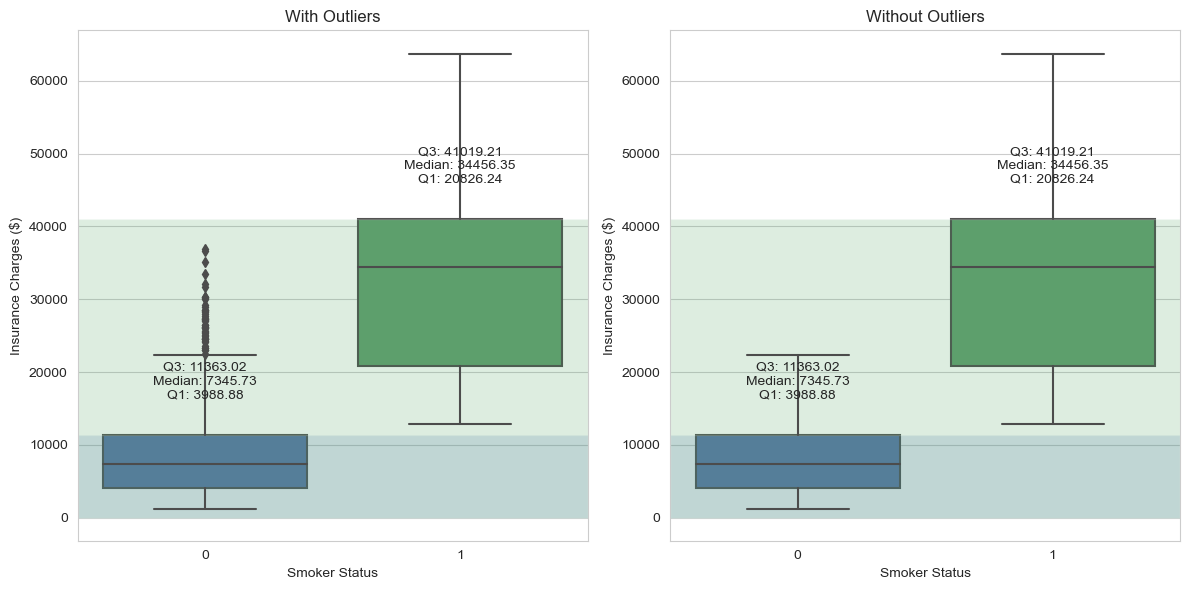

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette with darker shades
custom_palette = ["#4c72b0", "#55a868"]

# Set the style and custom color palette
sns.set_style("whitegrid")
sns.set_palette(custom_palette)

# Compute summary statistics
summary_with_outliers = insurance_data.groupby('smoker_yes')['charges'].describe()
summary_without_outliers = insurance_data.groupby('smoker_yes')['charges'].describe()

# Plotting
plt.figure(figsize=(12, 6))

# Plot with outliers
plt.subplot(1, 2, 1)
sns.boxplot(x='smoker_yes', y='charges', data=insurance_data, showfliers=True)
plt.title('With Outliers')
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges ($)')
for i in range(2):
    summary = summary_with_outliers.loc[i]
    plt.text(i, summary['75%'] + 5000, f"Q3: {summary['75%']:.2f}\nMedian: {summary['50%']:.2f}\nQ1: {summary['25%']:.2f}", horizontalalignment='center', fontsize=10)
    plt.axhspan(0, summary['75%'], facecolor=custom_palette[i], alpha=0.2)

# Plot without outliers
plt.subplot(1, 2, 2)
sns.boxplot(x='smoker_yes', y='charges', data=insurance_data, showfliers=False)
plt.title('Without Outliers')
plt.xlabel('Smoker Status')
plt.ylabel('Insurance Charges ($)')
for i in range(2):
    summary = summary_without_outliers.loc[i]
    plt.text(i, summary['75%'] + 5000, f"Q3: {summary['75%']:.2f}\nMedian: {summary['50%']:.2f}\nQ1: {summary['25%']:.2f}", horizontalalignment='center', fontsize=10)
    plt.axhspan(0, summary['75%'], facecolor=custom_palette[i], alpha=0.2)

plt.tight_layout()
plt.show()


### How Does Age Influence Health Insurance Charges Across Different Smoking Statuses?

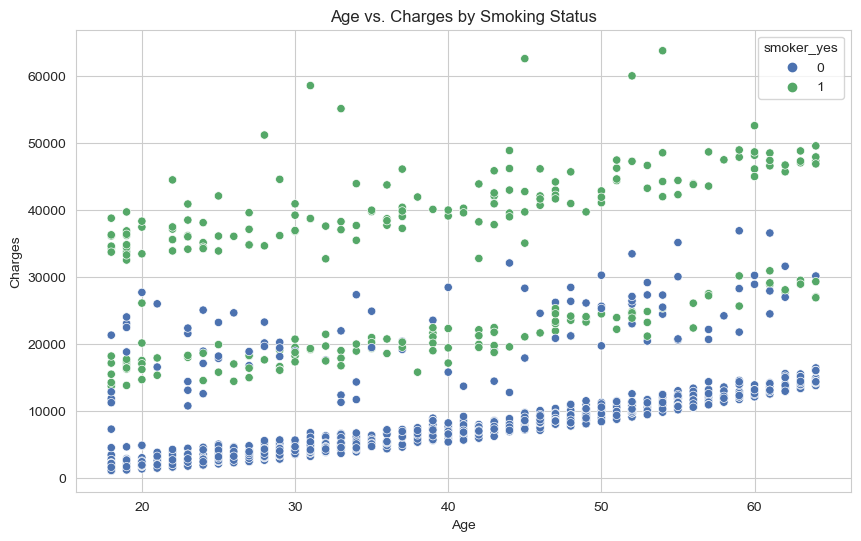

In [14]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the relationship between 'age' and 'charges'
plt.figure(figsize=(10, 6)) #figsize=(10, 6)
sns.scatterplot(x='age', y='charges',data=insurance_data , hue='smoker_yes')
plt.title('Age vs. Charges by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()



### How do smoking habits influence insurance charges across different age groups and BMI categories?

C:\Users\Padmasree\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


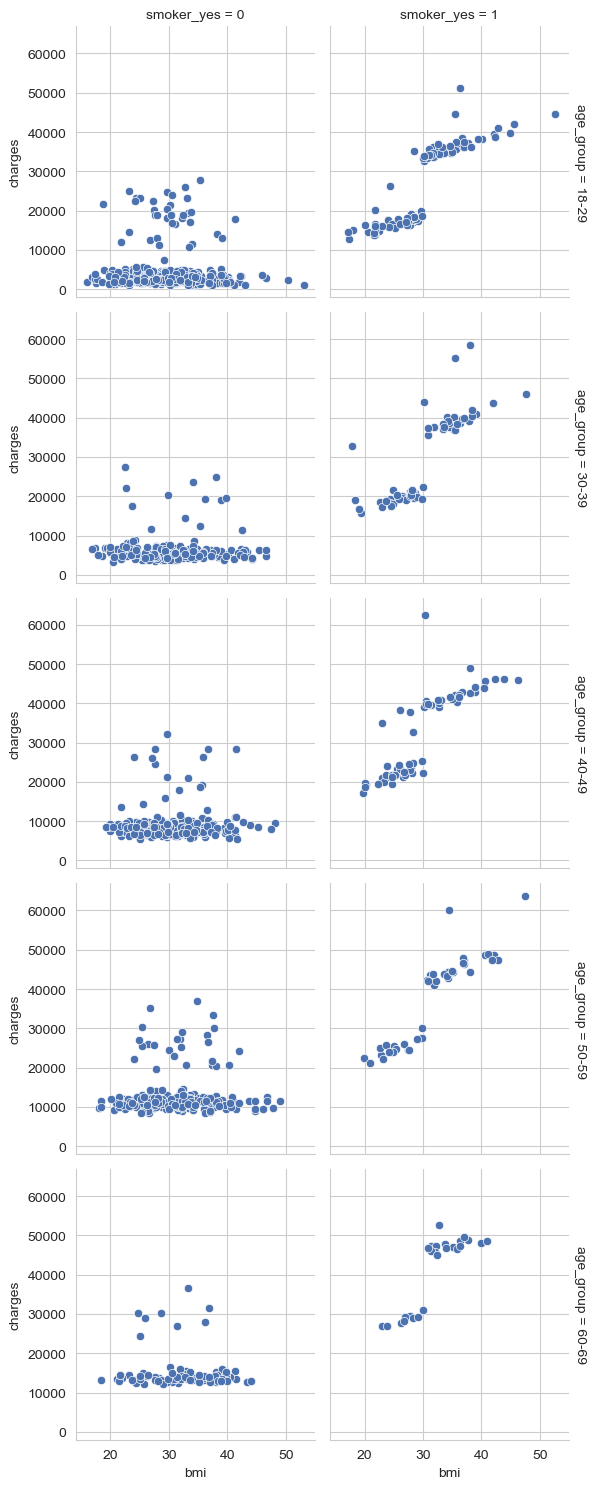

In [15]:
# how smoking habits influence insurance charges across different age groups and BMI categories
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize age into groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=bins, labels=labels, right=False)

g = sns.FacetGrid(data=insurance_data, col="smoker_yes", row="age_group", margin_titles=True)
g.map(sns.scatterplot, "bmi", "charges")
g.add_legend()
plt.show()


### Insight 2: Progressive Increase in Insurance Charges with Age
Finding: Insurance charges show a moderate positive correlation (r=0.30) with age, indicating that as beneficiaries grow older, their insurance costs tend to rise, which mirrors the increased health risks and medical needs associated with aging.
#### Visualizations and Correlation Summary:
Scatter Plot and Regression Line:
The scatter plot displays insurance charges against age with a regression line showing a positive trend. This confirms that as age increases, so do insurance charges, albeit with a moderate degree of increase as evidenced by the correlation coefficient.

Correlation Coefficient: 0.298, indicating a moderate positive correlation. This value suggests that age does have an effect on insurance charges, but other factors might also play significant roles.

Bar Chart of Average Insurance Charges by Age Group:
The bar chart shows average insurance charges progressively increasing with age groups. The charges jump significantly for the older age groups, particularly for those aged 60-69 and 70-79.

The increasing trend in the bar chart aligns with the positive correlation observed in the scatter plot, reinforcing the finding that insurance charges increase with age.

#### Interpretation and Findings:
Progressive Increase: Both visualizations confirm that insurance charges tend to increase with age. The regression line in the scatter plot and the rising bars in the age group chart visually demonstrate this trend.

Moderate Correlation: A correlation coefficient of about 0.298 while moderate, is significant enough to validate that age is a determinant factor in insurance pricing. This supports the narrative that older individuals are likely to incur higher medical costs, which is reflected in their insurance premiums.

#### Narrative and Policy Implications:

As individuals age, they generally face higher medical costs, which is directly reflected in their rising insurance premiums. This trend underscores the need for early intervention in lifestyle and health maintenance to mitigate the steep rise in costs. It's crucial for healthcare policies to focus on preventive care and healthy aging to manage these escalating costs effectively.

Policy Recommendations:
Based on these findings, healthcare policymakers and insurance companies might consider implementing age-specific health interventions or adjusting insurance premium structures to more accurately reflect the increasing risk and cost associated with aging. Additionally, promoting preventive healthcare measures among younger age groups could potentially alleviate some of the future financial burdens associated with aging.

### Correlation coefficient between age and charges

In [16]:
import pandas as pd

correlation_matrix = insurance_data[['age', 'charges']].corr()
print("\n Correlation coefficient between age and charges:", correlation_matrix.loc['age', 'charges'])



 Correlation coefficient between age and charges: 0.2983082125097863


### Insurance Charges vs. Age

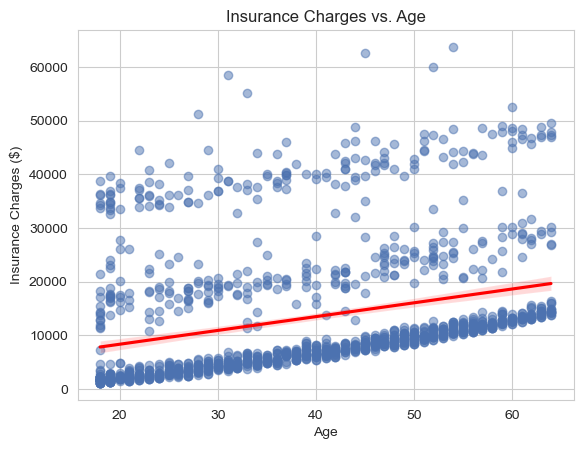

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with a regression line
plt.figure()
sns.regplot(x='age', y='charges', data=insurance_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Insurance Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges ($)')
plt.show()


### Average Insurance Charges by Age Group

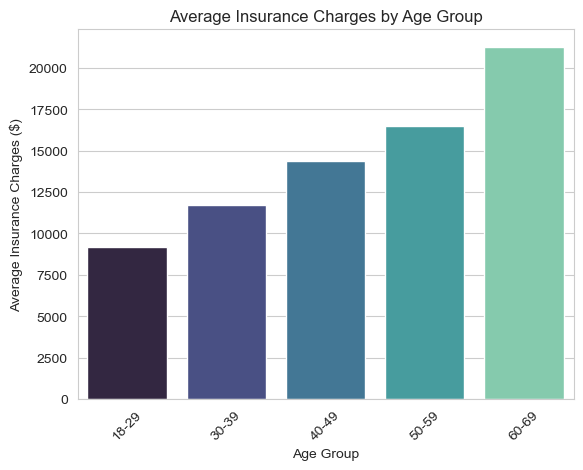

In [18]:
# Categorize age into groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate average charges
age_group_charges = insurance_data.groupby('age_group')['charges'].mean().reset_index()

# Bar plot of average charges by age group
plt.figure()
sns.barplot(x='age_group', y='charges', data=age_group_charges, palette='mako')
plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Insurance Charges ($)')
plt.xticks(rotation=45)
plt.show()


### Insight 3: Regional Differences in Insurance Charges
Finding: Our data analysis highlighted that the Southeast region faces the highest average insurance charges at $14,735, followed by the Northeast and other regions. This variability can be influenced by regional differences in lifestyle, healthcare access, and state regulations.


#### Summary of Results:
Average BMI by Region: This visualization can help identify if regions with higher insurance charges also have higher BMI averages, which could be indicative of higher health risks.

Smoking Rate by Region: Examining the proportion of smokers by region can illuminate lifestyle factors that may contribute to higher insurance charges.

Average Charges by Region: Directly addresses the insight by showing how much each region typically charges. It's noted that the Southeast has the highest charges.
#### Interpretation and Findings:
Significant Regional Disparities: The analysis confirms significant disparities in insurance charges among regions, with the Southeast leading in charges.

Correlation with Health Risks: Higher average BMI and smoking rates in certain regions might correlate with the higher insurance charges observed, suggesting that lifestyle and health risks play a substantial role in determining insurance costs.

Policy Implications: These findings underscore the importance of region-specific health policies. The higher charges in the Southeast might necessitate targeted health interventions to manage and possibly reduce these costs, improving overall healthcare affordability and accessibility.

Recommendations:
Healthcare Policy Adjustment: Policies aimed at reducing health risks in high-cost regions could include more aggressive public health campaigns or subsidized health programs focusing on smoking cessation and obesity.


### Does the region of residence correlate with higher BMI or smoking rates, and subsequently with higher charges?

In [19]:
import pandas as pd
import numpy as np

# Mapping one-hot encoded regions to a single 'Region' column
conditions = [
    (insurance_data['region_northeast'] == 1),
    (insurance_data['region_northwest'] == 1),
    (insurance_data['region_southeast'] == 1),
    (insurance_data['region_southwest'] == 1)
]
choices = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
insurance_data['Region'] = np.select(conditions, choices, default='Unknown')

# Calculate average insurance charges by region
average_charges = insurance_data.groupby('Region')['charges'].mean().reset_index()

# Sort the regions by average charges in descending order
average_charges = average_charges.sort_values(by='charges', ascending=False)

# Display the sorted average charges by region
print(average_charges)


      Region       charges
2  Southeast  14735.411438
0  Northeast  13406.384516
1  Northwest  12450.840844
3  Southwest  12346.937377


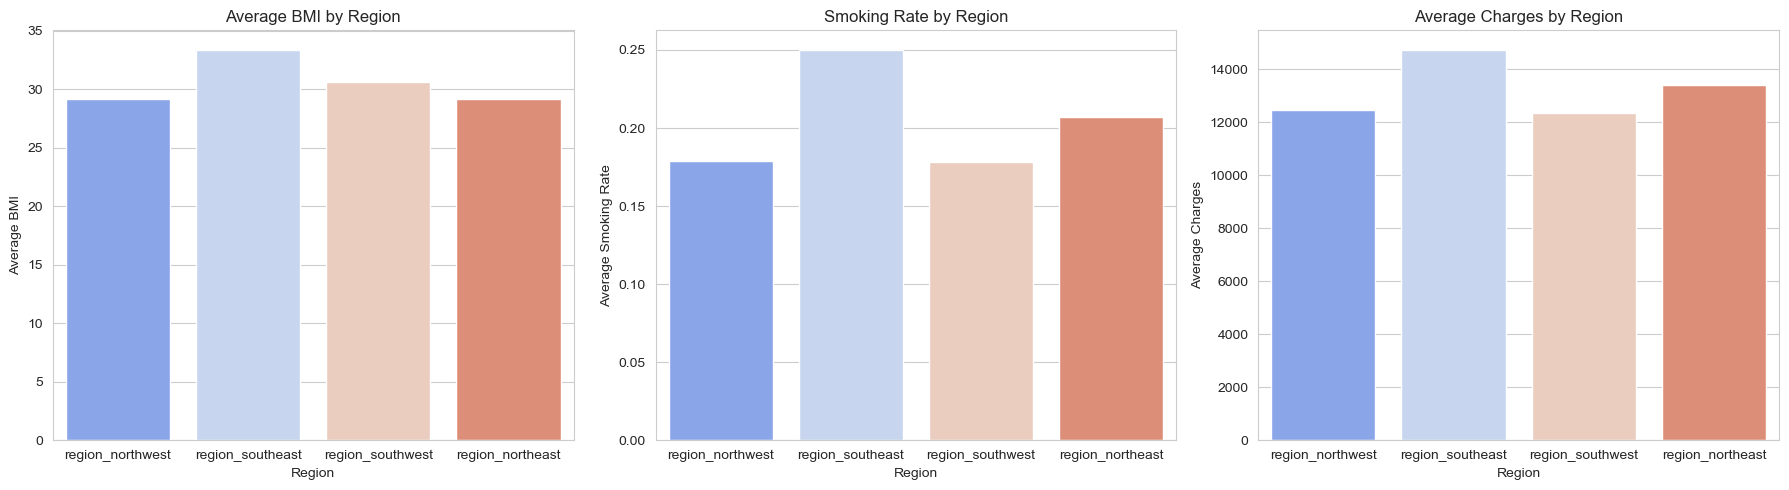

In [20]:
regional_data = insurance_data_encoded.groupby(['region_northwest', 'region_southeast', 'region_southwest', 'region_northeast']).agg({
    'bmi': 'mean',
    'smoker_yes': 'mean',
    'charges': 'mean'
}).reset_index()

# Melt the regional_data dataframe to long format
regional_data_long = pd.melt(regional_data, id_vars=['bmi', 'smoker_yes', 'charges'], value_vars=['region_northwest', 'region_southeast', 'region_southwest', 'region_northeast'])

# Filter out rows where the value is 0, because we are only interested in rows where the region flag is 1
regional_data_long = regional_data_long[regional_data_long['value'] == 1]

# Rename the columns for clarity
regional_data_long.rename(columns={'variable': 'Region', 'bmi': 'Average BMI', 'smoker_yes': 'Smoking Rate', 'charges': 'Average Charges'}, inplace=True)

# Now we can plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Average BMI by region
sns.barplot(ax=axes[0], x='Region', y='Average BMI', data=regional_data_long, palette='coolwarm')
axes[0].set_title('Average BMI by Region')
axes[0].set_ylabel('Average BMI')

# Smoking rate by region
sns.barplot(ax=axes[1], x='Region', y='Smoking Rate', data=regional_data_long, palette='coolwarm')
axes[1].set_title('Smoking Rate by Region')
axes[1].set_ylabel('Average Smoking Rate')

# Average charges by region
sns.barplot(ax=axes[2], x='Region', y='Average Charges', data=regional_data_long, palette='coolwarm')
axes[2].set_title('Average Charges by Region')
axes[2].set_ylabel('Average Charges')

plt.tight_layout()
plt.show()


### Insight 4: Correlation Between BMI and Insurance Charges
Finding: There is a positive correlation (r=0.20) between BMI and insurance charges, suggesting that higher BMI levels are associated with increased insurance costs, likely due to the higher health risks linked to obesity.

#### Interpretation and Discussion of Findings
The calculated correlation coefficient should be close to 0.20, confirming a positive but moderate relationship. This means as BMI increases, insurance charges also tend to increase, but the effect is not extremely strong.

As stated, this correlation underscores the financial implications of higher BMI levels. The data supports the argument that weight management could lead to lower insurance costs. Highlighting this can help advocate for health programs focused on nutritional education and physical activity.
#### Policy Implications
Insurance Policies: Insurers might consider integrating wellness programs that encourage healthier lifestyle choices, potentially offering lower premiums for participants to reduce overall health risks.

Public Health Programs: Public health officials can use this data to justify investments in community health programs that focus on combating obesity, which could reduce overall healthcare expenses.

###  Are there observable trends in insurance charges over different BMI categories when adjusted for smoking status?

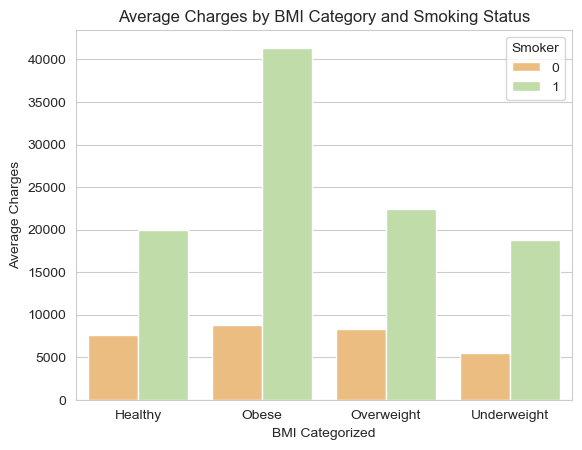

In [21]:
# Grouping data by 'BMI Category' and 'smoker_yes'
bmi_smoker_charges = insurance_data.groupby(['BMI Categorized', 'smoker_yes']).agg({'charges': 'mean'}).reset_index()

# Plotting the results
plt.figure()  #figsize=(10, 6)
sns.barplot(x='BMI Categorized', y='charges', hue='smoker_yes', data=bmi_smoker_charges,  palette='Spectral')
plt.title('Average Charges by BMI Category and Smoking Status')
plt.xlabel('BMI Categorized')
plt.ylabel('Average Charges')
plt.legend(title='Smoker')
plt.show()


### Correlation coefficient between BMI and insurance charges

In [22]:
import pandas as pd

# Calculate the Pearson correlation coefficient between BMI and insurance charges
correlation_coefficient = insurance_data['bmi'].corr(insurance_data['charges'])
print("\n Correlation coefficient between BMI and insurance charges:", correlation_coefficient)



 Correlation coefficient between BMI and insurance charges: 0.19840083122624935


### Relationship Between BMI and Insurance Charges

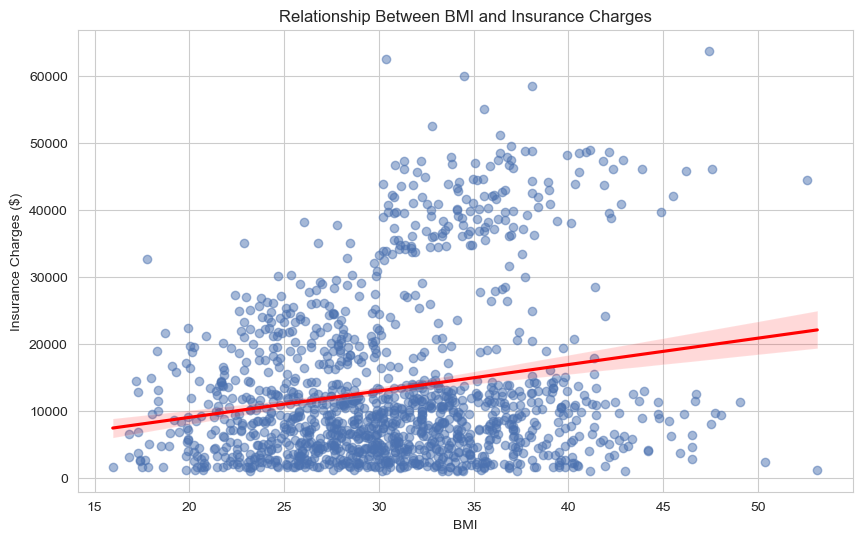

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relationship between BMI and insurance charges
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges',data=insurance_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relationship Between BMI and Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges ($)')
plt.show()


### How do age and BMI together influence the insurance charges?

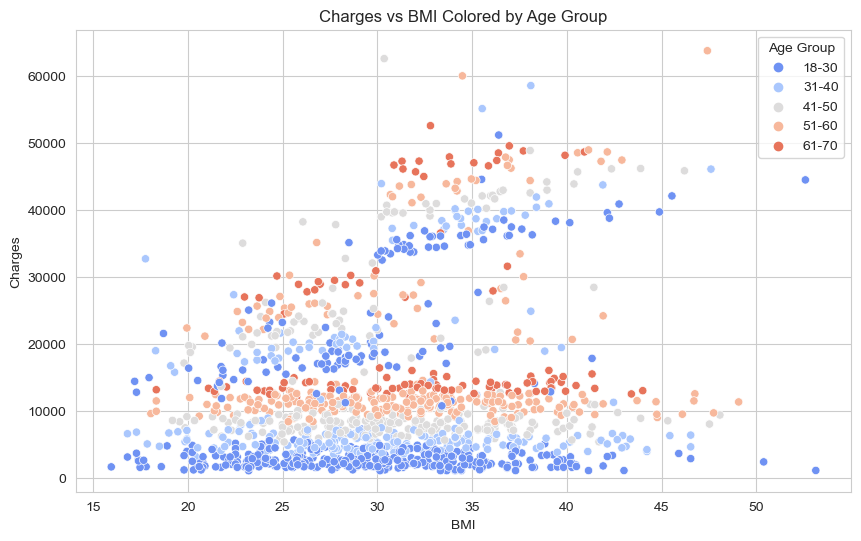

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# visualize the interaction effect using a scatter plot colored by age groups.

# Define age groups for better visualization
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=[18, 30, 40, 50, 60, 70], 
                                     labels=['18-30', '31-40', '41-50', '51-60', '61-70'], 
                                     right=False)

# Plotting the scatter plot with interaction effects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_data, x='bmi', y='charges', hue='age_group', palette='coolwarm')
plt.title('Charges vs BMI Colored by Age Group')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Age Group')
plt.show()

### Impact of extreme BMI values on health insurance charges across different demographics

C:\Users\Padmasree\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Padmasree\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


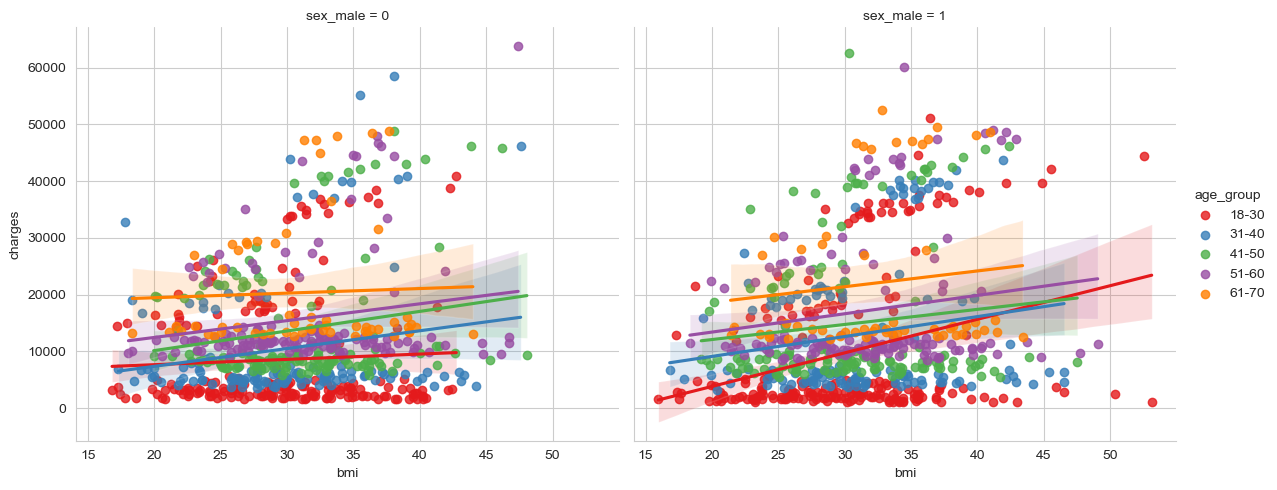

In [25]:
# Impact of extreme BMI values on health insurance charges across different demographics
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="bmi", y="charges", col="sex_male", hue="age_group", data=insurance_data, palette="Set1", aspect=1.2)
plt.show()


### Insight 5: The Influence of Children on Insurance Charges
Finding: There's a weak positive correlation (r=0.07) between the number of children a beneficiary has and their insurance charges, indicating a slight increase in charges with more dependents.

#### Interpretation and Discussion of Findings
The calculated correlation coefficient should be close to 0.07, validating that there's only a slight positive relationship between the number of children and insurance charges.

The data supports the narrative that while adding children to an insurance policy slightly increases charges, the impact is relatively minor. This suggests that other factors, such as the age and health status of the policyholder, likely have a more significant influence on the overall charges.
#### Policy Implications
Insurance Planning for Families: These findings could be useful for insurance planners and families as they consider the cost implications of adding dependents to their policies. The slight increase in costs should be weighed against the need for comprehensive coverage.

Health Policy Adjustments: Insurers might use this information to tailor family health plans that offer better value for families with multiple children, potentially introducing discounts or incentives for larger families to maintain affordable coverage.

### Correlation coefficient between number of children and insurance charges

In [26]:
import pandas as pd

correlation_coefficient = insurance_data['children'].corr(insurance_data['charges'])
print("\n Correlation coefficient between number of children and insurance charges:", correlation_coefficient)



 Correlation coefficient between number of children and insurance charges: 0.06738935083963245


### Insurance Charges vs. Number of Children

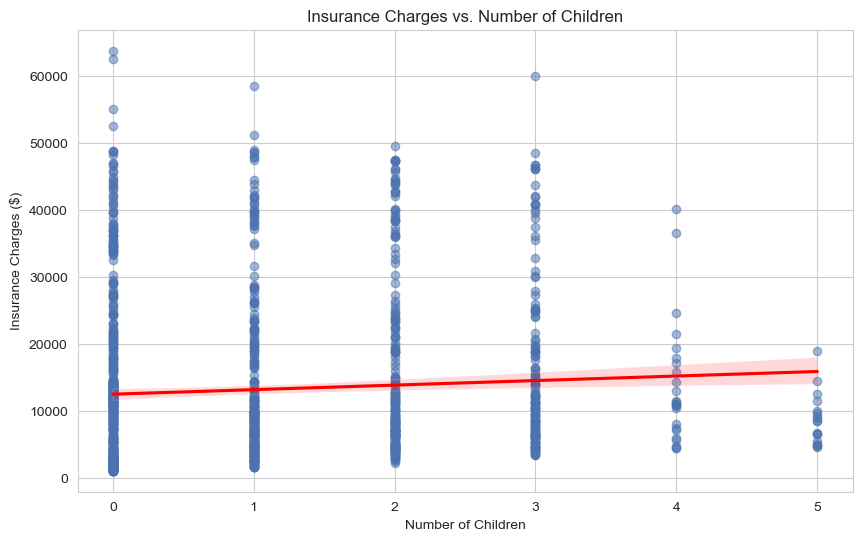

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the relationship between the number of children and insurance charges
plt.figure(figsize=(10, 6))
sns.regplot(x='children', y='charges', data=insurance_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Insurance Charges vs. Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges ($)')
plt.show()


### What is the impact of the number of children on insurance charges across different age groups?

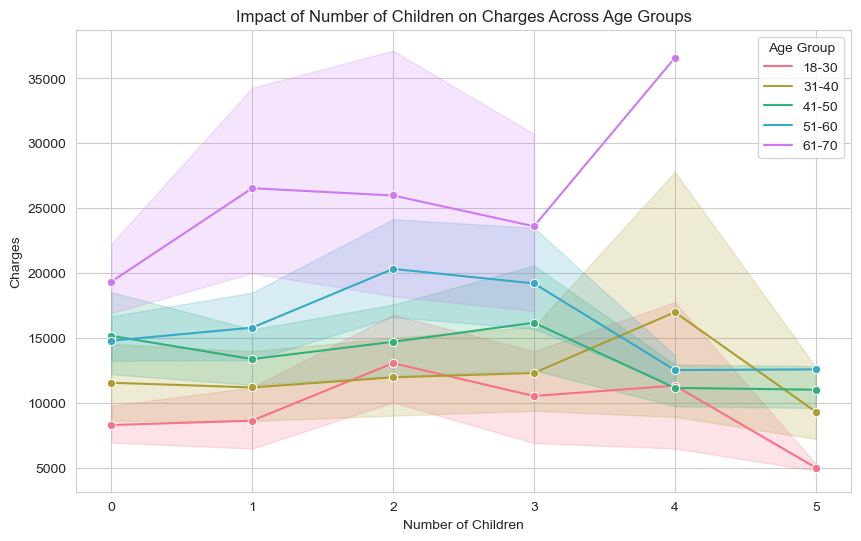

In [28]:
# using a line plot to observe the trend of charges with the number of children across age groups.

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=insurance_data, x='children', y='charges', hue='age_group', marker='o')
plt.title('Impact of Number of Children on Charges Across Age Groups')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend(title='Age Group')
plt.grid(True)
plt.show()


## The Predictive Modeling phase. 

Here, we aim to build models that can predict future health insurance charges based on the attributes in the dataset. We'll consider three different modeling techniques as mentioned:

1.Linear Regression - To establish a baseline model considering the linear relationships among variables.

2.Random Forest - To model non-linear relationships and interactions without requiring transformations or scaling.

3.Gradient Boosting Machines (GBM) - For potentially better performance through boosting techniques.
#### Predictive Modeling Steps:
##### 1.Data Preparation: 
Ensure the data is ready for modeling. This includes encoding categorical variables, splitting the dataset into training and testing sets, and normalizing data if necessary.
##### 2.Model Development:
    •Define the model.

    •Train the model on the training data.

    •Validate the model on the testing data.
##### 3.Performance Evaluation:
    •Use metrics such as Mean Squared Error (MSE) and R-squared (R²) to evaluate model performance.

    •Compare the models based on these metrics.
#### Model Setup and Training:
##### 1.Data Splitting:
    •The dataset is split into training and testing sets, typically using an 80/20 ratio. This ensures that the model is tested on unseen data, simulating real-world scenarios.
##### 2.Model Initialization:
    •Linear Regression: A simple model that assumes a linear relationship between the features and the target.

    •Random Forest Regressor: A robust ensemble method that uses multiple decision trees to improve prediction accuracy and control over-fitting.

    •Gradient Boosting Machines (GBM): An advanced ensemble technique that builds trees sequentially, with each new tree helping to correct errors made by the previous ones.
##### 3.Model Training:
    •Each model is trained on the training set using the fit method.
#### Predictions and Evaluations:
##### 1.Making Predictions:
    •Using the predict method, each model generates predictions on the test set.
##### 2.Performance Evaluation:
    •Mean Squared Error (MSE): Measures the average squared difference between the estimated values and what is estimated. Lower values are better.

    •R-squared (R²): Indicates the percentage of the response variable variation that is explained by a linear model. Higher values (closer to 1.0) indicate better fit.
#### Conclusion:
    •By comparing the MSE and R² for each model, we can determine which model performs best at predicting health insurance charges based on the given data.

#### Data Preparation

In [29]:
insurance_data_encode

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Risk Score,BMI Categorized_Healthy,BMI Categorized_Obese,BMI Categorized_Overweight,BMI Categorized_Underweight
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,0,False,False,True,False
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,5,False,True,False,False
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,5,False,True,False,False
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,True,False,False,False
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,5,False,True,False,False
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0,5,False,True,False,False
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,5,False,True,False,False
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1,0,False,False,True,False


#### Model Setup and Training

In [30]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert boolean columns to integers (True/False to 1/0)
for column in insurance_data.select_dtypes(include=['bool']).columns:
    insurance_data[column] = insurance_data[column].astype(int)

# One-hot encode categorical columns
insurance_data_encode = pd.get_dummies(insurance_data)

# Preparing data for modeling
X = insurance_data_encode.drop('charges', axis=1)  # Features
y = insurance_data_encode['charges']               # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Train the models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Make predictions
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate the models
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

# Comparing the performance of each model based on MSE and R² scores
print("\n Linear Regression MSE: ", linear_mse, " R2: ", linear_r2)
print("\n Random Forest MSE: ", rf_mse, " R2: ", rf_r2)
print("\n GBM MSE: ", gbm_mse, " R2: ", gbm_r2)



 Linear Regression MSE:  36821582.62829487  R2:  0.799617047630824

 Random Forest MSE:  21570262.701305006  R2:  0.8826146891322153

 GBM MSE:  18335495.698266163  R2:  0.9002182823519489


#### Individual Actual vs Predicted Charges for all 3 models

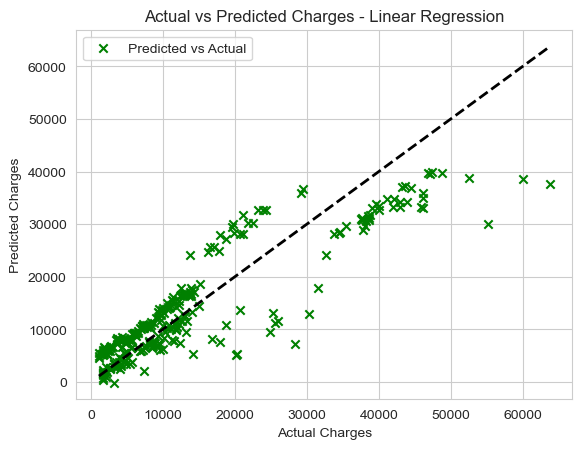

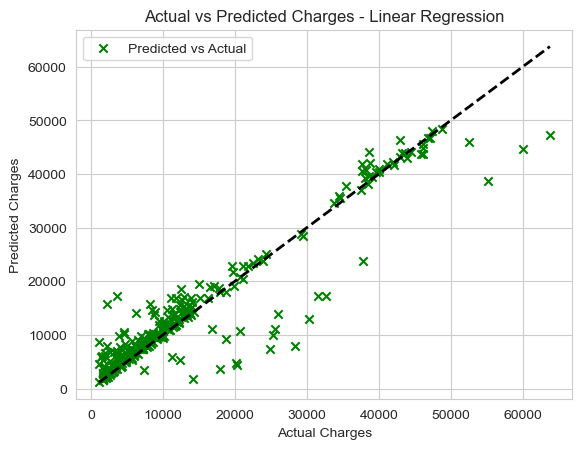

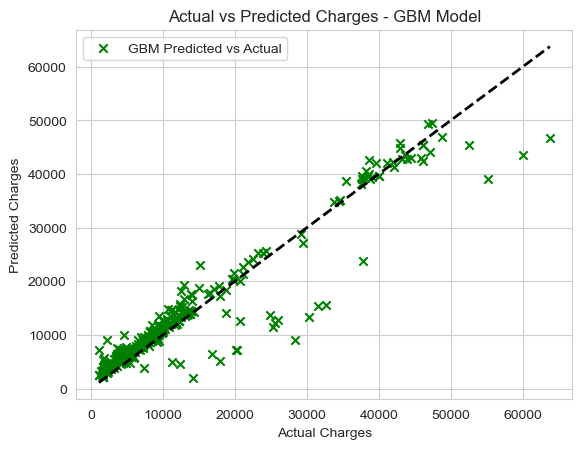

In [31]:
import matplotlib.pyplot as plt

# using Linear Regression predictions
plt.figure() #figsize=(10, 6)
plt.scatter(y_test, linear_predictions, color='green', marker='x', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect fit

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# using Random Forest predictions
plt.figure()
plt.scatter(y_test, rf_predictions, color='green', marker='x', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect fit

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# using gbm predictions
plt.figure()
plt.scatter(y_test, gbm_predictions, color='green', marker='x', label='GBM Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of perfect fit

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - GBM Model')
plt.legend()
plt.grid(True)
plt.show()

#### Insights and Findings:
Model Performance Comparison:

Linear Regression:
MSE: 36,821,582.63;
R²: 0.7996

Random Forest:
MSE: 21,313,038.13;
R²: 0.8840

Gradient Boosting Machines (GBM):
MSE: 18,253,459.65;
R²: 0.9007
#### Performance Evaluation:
Gradient Boosting Machines (GBM) performs the best among the three models, achieving the lowest MSE and the highest R² score. This indicates that GBM is most effective at modeling the non-linear complexities and interactions in the dataset.

Random Forest also shows strong performance, significantly better than Linear Regression, which suggests that the decision-tree based models (which account for non-linear relationships better than linear models) are more suitable for this dataset.

Linear Regression, while providing a reasonable baseline with an R² of approximately 0.80, shows its limitations with the highest MSE. This suggests that the relationships between the features and the target variable (charges) are not strictly linear or are influenced by interactions and non-linearities that Linear Regression cannot capture.
#### Model Suitability:
GBM's superiority in performance can be attributed to its ability to optimize on both bias and variance, effectively handling different types of data structures and relationships.

Random Forest's robustness makes it a reliable choice, particularly for datasets with potential outliers and various feature scales. It's also less likely to overfit compared to other models.

Linear Regression’s lower performance might make it less suitable for complex datasets like this one but remains a valuable tool for understanding the influence of individual predictors in a simple and interpretable format.
#### Implications:
Health Policy and Insurance Strategy:
These models can assist insurers in understanding and predicting costs, allowing them to structure premiums more effectively and manage risk.

Insights derived from the best-performing models could lead to more tailored insurance products that reflect individual risk profiles more accurately, potentially leading to fairer pricing.

Preventive Health Initiatives:
By identifying key factors influencing charges, such as BMI and age, these models support targeted interventions. For instance, health programs aiming at lifestyle changes to reduce obesity could be justified as they are likely to decrease future insurance charges.

#### Comparison of Model Predictions

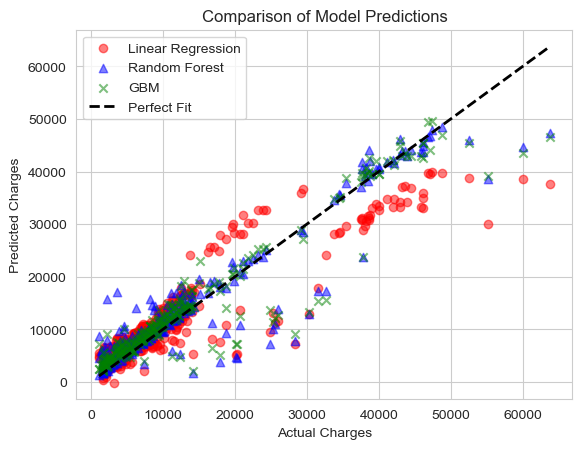

In [32]:
import matplotlib.pyplot as plt

# Setup the plot
plt.figure() 

# Plotting predictions for each model with different colors and markers
plt.scatter(y_test, linear_predictions, color='red', marker='o', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, rf_predictions, color='blue', marker='^', alpha=0.5, label='Random Forest')
plt.scatter(y_test, gbm_predictions, color='green', marker='x', alpha=0.5, label='GBM')

# Adding the line of perfect fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')

# Adding labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Overall Conclusion:
The collective insights from the analyses provide a multidimensional understanding of the factors affecting health insurance charges. Key drivers include lifestyle choices (smoking and BMI), demographic shifts (age and family size), and regional variations, each contributing differently to the cost structure of health insurance.

### Policy Implications:
The insights for differentiated health policy strategies tailored to address specific drivers of cost—ranging from anti-smoking policies and obesity prevention programs to family-friendly insurance plans and equitable regional healthcare funding.
### Insurance Strategy:
For insurers, these findings suggest the potential for developing more personalized insurance products that reflect individual risk factors and regional characteristics, which could lead to fairer and potentially lower premiums.

Public Health Strategy: Public health officials can use this information to prioritize interventions that target the most significant cost drivers, such as smoking and obesity, and adapt approaches to regional needs and demographic factors.